In [1]:
import simcmb
import itertools
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
Yo0 = simcmb.Yobj()
PM0 = simcmb.PS_Maker(Yo0)

In [3]:
PM0.get_cls(save_to_dict='a')

from 18:58:00.457578 P to 18:58:01.960044 P or 1.502466 seconds total


In [4]:
PM0.result_parameters

{'a': {'FORCAMB': {'max_l': 10300,
   'max_l_tensor': 10300,
   'CustomSources': {'c_source_func': '~'}},
  'ITERABLES': {'InitPower.r': array([0.01 , 0.055, 0.1  ]),
   'Alens': array([0.8, 1. , 1.2])},
  'seed': 0,
  'verbose': 1,
  'normalize_cls': False,
  'TT_units': 'muK',
  'outfile_dir': 'outfiles',
  'noise_type': 'white',
  'noise_level': 5,
  'beam_fwhm': 3,
  'l_step': 10,
  'extra_l': 300,
  'max_l_use': 10000}}

In [5]:
Yo0.update_val('InitPower.r', 0.04)

In [6]:
PM0.result_parameters

{'a': {'FORCAMB': {'max_l': 10300,
   'max_l_tensor': 10300,
   'CustomSources': {'c_source_func': '~'}},
  'ITERABLES': {'InitPower.r': array([0.01 , 0.055, 0.1  ]),
   'Alens': array([0.8, 1. , 1.2])},
  'seed': 0,
  'verbose': 1,
  'normalize_cls': False,
  'TT_units': 'muK',
  'outfile_dir': 'outfiles',
  'noise_type': 'white',
  'noise_level': 5,
  'beam_fwhm': 3,
  'l_step': 10,
  'extra_l': 300,
  'max_l_use': 10000,
  'InitPower.r': 0.04}}

In [7]:
PM0.get_cls(save_to_dict='b')

from 18:58:22.351430 P to 18:58:23.831624 P or 1.480194 seconds total


In [8]:
PM0.result_parameters

{'a': {'FORCAMB': {'max_l': 10300,
   'max_l_tensor': 10300,
   'InitPower': {'r': 0.04},
   'CustomSources': {'c_source_func': '~'}},
  'ITERABLES': {'InitPower.r': array([0.01 , 0.055, 0.1  ]),
   'Alens': array([0.8, 1. , 1.2])},
  'seed': 0,
  'verbose': 1,
  'normalize_cls': False,
  'TT_units': 'muK',
  'outfile_dir': 'outfiles',
  'noise_type': 'white',
  'noise_level': 5,
  'beam_fwhm': 3,
  'l_step': 10,
  'extra_l': 300,
  'max_l_use': 10000,
  'InitPower.r': 0.04},
 'b': {'FORCAMB': {'max_l': 10300,
   'max_l_tensor': 10300,
   'InitPower': {'r': 0.04},
   'CustomSources': {'c_source_func': '~'}},
  'ITERABLES': {'InitPower.r': array([0.01 , 0.055, 0.1  ]),
   'Alens': array([0.8, 1. , 1.2])},
  'seed': 0,
  'verbose': 1,
  'normalize_cls': False,
  'TT_units': 'muK',
  'outfile_dir': 'outfiles',
  'noise_type': 'white',
  'noise_level': 5,
  'beam_fwhm': 3,
  'l_step': 10,
  'extra_l': 300,
  'max_l_use': 10000,
  'InitPower.r': 0.04}}

In [6]:
PM0.loop_sims(user_params=True)

from 18:37:46.289148 P to 18:37:47.661187 P or 1.372039 seconds total
from 18:37:47.662950 P to 18:37:49.074406 P or 1.411456 seconds total
from 18:37:49.076176 P to 18:37:50.407418 P or 1.331242 seconds total
from 18:37:50.409037 P to 18:37:51.772635 P or 1.363598 seconds total
from 18:37:51.774371 P to 18:37:53.141753 P or 1.367382 seconds total
from 18:37:53.143457 P to 18:37:54.518081 P or 1.374624 seconds total
from 18:37:54.519725 P to 18:37:55.833797 P or 1.314072 seconds total
from 18:37:55.835433 P to 18:37:57.163535 P or 1.328102 seconds total
from 18:37:57.165288 P to 18:37:58.574732 P or 1.409444 seconds total


In [7]:
PM0.result_parameters['runid_230510183753143440_587928']

{'FORCAMB': {'max_l': 10300,
  'max_l_tensor': 10300,
  'Alens': 1.2,
  'CustomSources': {'c_source_func': '~'}},
 'ITERABLES': {'InitPower.r': array([0.01 , 0.055, 0.1  ]),
  'Alens': array([0.8, 1. , 1.2])},
 'seed': 0,
 'verbose': 1,
 'normalize_cls': False,
 'TT_units': 'muK',
 'outfile_dir': 'outfiles',
 'noise_type': 'white',
 'noise_level': 5,
 'beam_fwhm': 3,
 'extra_l': 300,
 'max_l_use': 10000,
 'InitPower.r': 0.1,
 'Alens': 1.2}

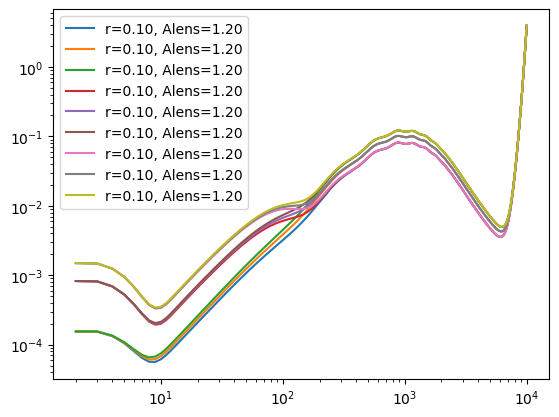

In [8]:
for r in PM0.runids:
    d, p = PM0.results[r], PM0.result_parameters[r]
    try:
        label_r = p['FORCAMB']['InitPower']['r']
    except KeyError:
        label_r = Yo0._all_params_dict['BASECAMBPARAMS']['InitPower']['r']
    try:
        label_A = p['FORCAMB']['Alens']
    except KeyError:
        label_A = Yo0._all_params_dict['BASECAMBPARAMS']['Alens']
    plt.plot(d['l'][2:], d['clBB'][2:],
             label=f"r={label_r:.2f}, Alens={label_A:.2f}")
plt.loglog()
plt.legend()
plt.show()

In [12]:
PM0.savecls(savedir="/Users/sammcd/simcmb/simcmb/outfiles/", permission='w')

In [14]:
f1 = simcmb.clplotting.flatmap(192, 5, cl_dict=PM0.results['runid_230510163754643941_008422'])

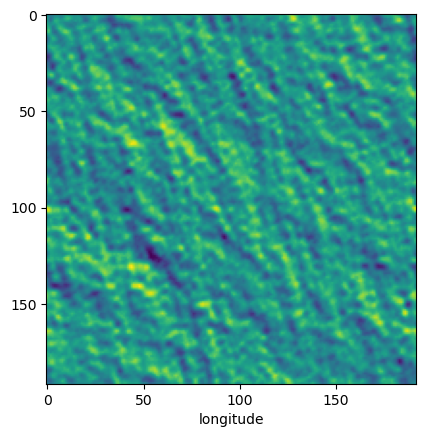

In [20]:
plt.imshow(f1.flatmap('T', seed = 0)[0] - f1.flatmap('T', seed = 0)[0])
plt.xlabel("longitude")
plt.xticks(range(0,200,50))
plt.yticks(range(0,200,50))
plt.show()

In [21]:
np.sum(f1.flatmap('T', seed = 0)[0] - f1.flatmap('T', seed = 0)[0]),\
np.sum(f1.flatmap('T', seed = 1)[0] - f1.flatmap('T', seed = 0)[0])

(3.798049874603748e-09, -2192.2957996204495)

In [22]:
f1.flatmap('TEB').shape

(3, 192, 192)

In [23]:
f1.flatmap('TQU').shape

(3, 192, 192)

In [24]:
f2 = simcmb.clplotting.flatmap(192, 5)
f2.flatmap('what')

if you don't want to restrict to a `cl_dict` dictionary, use `self._flatmap` instead


In [25]:
f1.flatmap('E'), f1.flatmap('EE'), f1.flatmap('clEE')

(array([[[ 2610.23611027,   996.59680942,  -433.52124545, ...,
           2968.51733843,  3791.64292983,  3376.94765776],
         [ 2730.92756164,  1748.50634221,  1121.79874328, ...,
           3946.31115438,  5078.24615873,  3472.60107777],
         [ 1555.20379526,  1817.2136932 ,   942.44360744, ...,
           3984.8237862 ,  2699.04508229,  2430.08967591],
         ...,
         [-3358.26724208, -4414.26478264, -3596.30913205, ...,
          -1541.52468295,  -917.95289793, -2390.42630521],
         [ -955.21299751, -2033.06654152, -3106.33288657, ...,
          -1100.39107104,  -322.73052503,  -103.21080266],
         [ 1178.82247108,  -112.56310261, -2110.66776298, ...,
            180.06083169,  2362.02947639,  2360.26679581]]]),
 array([[[ -431.84638452,   875.98989889,   727.93048026, ...,
          -1666.89194059, -1495.89706439, -1222.79577865],
         [-1072.93514952,   612.29506006,  2854.07448706, ...,
          -3798.13549112, -3894.90291512, -3009.12513317],
       

In [27]:
f1.flatmap('J')

not a valid map specification


In [23]:
new_YD = simcmb.Ydict(user_config="/Users/sammcd/simcmb/simcmb/outfiles/runid_230510162304075266_002278_params.yaml")
new_PM = simcmb.PS_Maker(new_YD)

In [22]:
import h5py

In [24]:
old_cls = {}
with h5py.File("/Users/sammcd/simcmb/simcmb/outfiles/runid_230510162304075266_002278_results.h5", 'r') as f:
    for k in f:
        old_cls[k] = np.array(f[k])

In [25]:
new_cls = new_PM.get_cls()

from 16:26:08.584258 P to 16:26:09.938164 P or 1.353906 seconds total


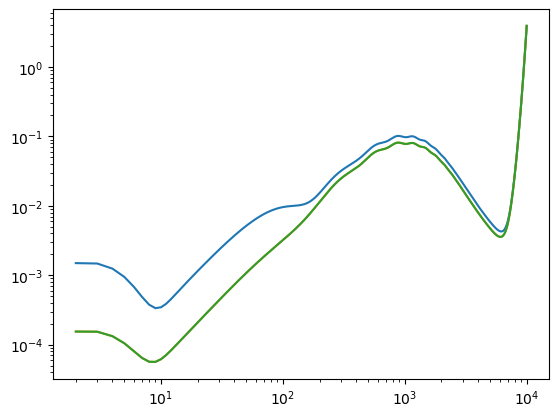

In [26]:
plt.plot(new_cls['l'][2:], new_cls['clBB'][2:])
plt.plot(new_cls['l'][2:], PM0.results['runid_230510162304075266_002278']['clBB'][2:])
plt.plot(old_cls['l'][2:], old_cls['clBB'][2:])
plt.loglog()
plt.show()

In [28]:
Yd0.update_val?

for 10000 multipoles, one h5 file is roughly 0.5-1MB